<a href="https://colab.research.google.com/github/sejongsmarcle/2023_Spring_Kaggle_Study/blob/main/Untitled17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 2주차 캐글스터디
# -각 날짜의 1시간 전의 기상상황을 가지고 1시간 후의 따릉이 대여수 예측해보기

In [2]:
import pandas as pd #데이터 분석을 용이하게 해주는 도구의 모음인 판다스 패키지 불러오기
from sklearn.tree import DecisionTreeRegressor  # 랜덤포레스트 사용 #디시전 트리가 모여서 랜덤포레스트가 되는것임 
from sklearn.ensemble import RandomForestRegressor #랜덤 포레스트 불러오기

In [3]:
#데이터 불러오기
test = pd.read_csv('/content/drive/MyDrive/따릉이/test.csv')  #변수에 저장
train= pd.read_csv('/content/drive/MyDrive/따릉이/train.csv') # xptmxmrkqt qustn wjwkd
submission = pd.read_csv('/content/drive/MyDrive/따릉이/submission.csv') #제출을 위한 파일 저장 경로

# EDA

In [4]:
#상위 5개 행 확인
train.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


모든 데이터의 값이 숫자형 데이터(수치)임을 확인 하였음.

-> 문자형보다 데이터 처리하기 수월할 듯

* id : 날짜와 시간별 id
* hour_bef_temperature : 1시간 전 기온
* hour_bef_precipitation : 1시간 전 비 정보, 비가 오지 않았으면 0, 비가 오면 1
* hour_bef_windspeed : 1시간 전 풍속(평균)
* hour_bef_humidity : 1시간 전 습도
* hour_bef_visibility : 1시간 전 시정(視程), 시계(視界)(특정 기상 상태에 따른 가시성을 의미)
* hour_bef_ozone : 1시간 전 오존
* hour_bef_pm10 : 1시간 전 미세먼지(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지)
* hour_bef_pm2.5 : 1시간 전 미세먼지(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지)
* count : 시간에 따른 따릉이 대여 수

In [5]:
test.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,0,7,20.7,0.0,1.3,62.0,954.0,0.041,44.0,27.0
1,1,17,30.0,0.0,5.4,33.0,1590.0,0.061,49.0,36.0
2,2,13,19.0,1.0,2.1,95.0,193.0,0.020,36.0,28.0
3,4,6,22.5,0.0,2.5,60.0,1185.0,0.027,52.0,38.0
4,5,22,14.6,1.0,3.4,93.0,218.0,0.041,18.0,15.0


테스트 데이터 또한 숫자형으로만 이루어져 있음

카운트는 없음 -> 카운트 정답값을 예측해야 하기 때문

In [6]:
submission.head()

,id,count
0,0,NaN
1,1,NaN
2,2,NaN
3,4,NaN
4,5,NaN


각각의 id별로 값이 비어있음을 확인

In [7]:
# pd.DataFrame.shape : 행의 개수와 열의 개수 속성 확인하기
print(train.shape)
print(test.shape)
print(submission.shape)

(1459, 11)
(715, 10)
(715, 2)


train에 비해 test셋은 count 열이 없기 떄문에 열의 개수가 1개 차이남.

test셋과 제출할 submission 셋의 행의 크기는 같은것으로 확인됨. 

테스트 셋의 예측값을 submission에 입력해야 하기 때문

In [8]:
# 결측값 확인하기
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


id 와 hour은 모든 값이 잘 채워져 있음.

한시간전 온도와 강수량은 2개 비어져있음.

풍속도 부족함. 

값이 비어있는 컬럼이 있음 - 결측값이 있음

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      715 non-null    int64  
 1   hour                    715 non-null    int64  
 2   hour_bef_temperature    714 non-null    float64
 3   hour_bef_precipitation  714 non-null    float64
 4   hour_bef_windspeed      714 non-null    float64
 5   hour_bef_humidity       714 non-null    float64
 6   hour_bef_visibility     714 non-null    float64
 7   hour_bef_ozone          680 non-null    float64
 8   hour_bef_pm10           678 non-null    float64
 9   hour_bef_pm2.5          679 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 56.0 KB


test에도 결측값있음

In [10]:
train.describe() #기술 통계량

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
count,1459.000000,1459.000000,1457.000000,1457.000000,1450.000000,1457.000000,1457.000000,1383.000000,1369.000000,1342.000000,1459.000000
mean,1105.914325,11.493489,16.717433,0.031572,2.479034,52.231297,1405.216884,0.039149,57.168736,30.327124,108.563400
std,631.338681,6.922790,5.239150,0.174917,1.378265,20.370387,583.131708,0.019509,31.771019,14.713252,82.631733
min,3.000000,0.000000,3.100000,0.000000,0.000000,7.000000,78.000000,0.003000,9.000000,8.000000,1.000000
25%,555.500000,5.500000,12.800000,0.000000,1.400000,36.000000,879.000000,0.025500,36.000000,20.000000,37.000000
50%,1115.000000,11.000000,16.600000,0.000000,2.300000,51.000000,1577.000000,0.039000,51.000000,26.000000,96.000000
75%,1651.000000,17.500000,20.100000,0.000000,3.400000,69.000000,1994.000000,0.052000,69.000000,37.000000,150.000000
max,2179.000000,23.000000,30.000000,1.000000,8.000000,99.000000,2000.000000,0.125000,269.000000,90.000000,431.000000


In [11]:
test.describe() #테스트 셋의 기술 통계량 확인하기

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
count,715.000000,715.000000,714.000000,714.000000,714.000000,714.000000,714.000000,680.000000,678.000000,679.000000
mean,1056.854545,11.472727,23.263305,0.051821,2.388515,56.668067,1359.494398,0.041196,36.930678,24.939617
std,625.574471,6.928427,4.039645,0.221820,1.171270,19.661880,614.171870,0.020656,12.641503,10.075857
min,0.000000,0.000000,14.600000,0.000000,0.000000,16.000000,126.000000,0.003000,9.000000,7.000000
25%,507.000000,5.500000,20.300000,0.000000,1.500000,42.000000,807.250000,0.027000,28.000000,17.000000
50%,1046.000000,11.000000,22.900000,0.000000,2.300000,55.000000,1489.000000,0.039000,35.000000,24.000000
75%,1616.500000,17.000000,26.375000,0.000000,3.275000,73.750000,2000.000000,0.052250,45.000000,31.000000
max,2177.000000,23.000000,33.800000,1.000000,5.900000,100.000000,2000.000000,0.138000,94.000000,69.000000


시간별로 따릉이 대여량은 어떠하게 변하고 있을까> - groupby함수 사용

In [12]:
train.groupby('hour').mean()['count']  #시간에 대한 컬럼들의 평균 산출, 그중 count만 도출 즉, 시간별 대여량 산출

hour
0      71.766667
1      47.606557
2      31.409836
3      21.377049
4      13.524590
5      13.114754
6      24.557377
7      62.360656
8     136.688525
9      93.540984
10     78.803279
11     88.327869
12    111.901639
13    120.050000
14    134.590164
15    152.967213
16    169.100000
17    187.133333
18    262.163934
19    201.606557
20    164.868852
21    168.816667
22    148.245902
23    103.852459
Name: count, dtype: float64

이 값을 시각화 하기

<Axes: xlabel='hour'>

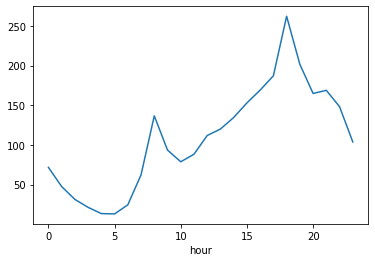

In [13]:
train.groupby('hour').mean()['count'].plot() #선함수로 시각화

8시, 17-18시 대여량 높음 - 등하교, 출퇴근시에 사용량이 높은것을 확인함

시각화

In [14]:
import matplotlib.pyplot as plt #맷플롭 패키지를 plt라고 하여 불러옴

1. 색깔

|문자열|약자|
|----|-----|
|blue|b|
|green|g|
|red|r|
|cyan|c|
|magenta|m|
|yellow|y|
|black|k|
|white|w|

2. 마커

|마커|의미|
|----|----|
|.|점|
|o|원|
|v|역삼각형|
|^|삼각형|
|s|사각형|
|*|별|
|x|엑스|
|d|다이아몬드|

3. 선

|문자열|의미|
|-----|-----|
| - | 실선|
|-- | 끊어진 실선|
| -.| 점+실선|
|:|점선|

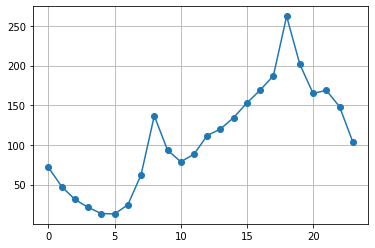

In [15]:
plt.plot(train.groupby('hour').mean()['count'],'o-') #맷플롭의 plot함수를 사용하여 아까 산출한 시간대별  따릉이 사용량을 시각화함 'o'를 사용함으로서 점으로 표시하도록 하였음.-로 실선도 표기함.
plt.grid() #그리드 추가

Text(0, 0.5, 'count')

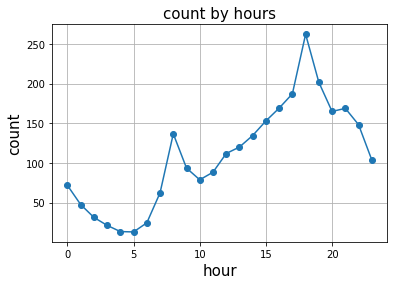

In [16]:
plt.plot(train.groupby('hour').mean()['count'],'o-')  #만든 그래프 그대로 가져오기
plt.grid() #그리드

#그래프 제목 설정
plt.title('count by hours', fontsize = 15) #폰트 사이즈는 15
plt.xlabel('hour', fontsize = 15 ) #똑같이 폰트 사이즈는 15
plt.ylabel('count', fontsize = 15 ) #폰트 같음 y라벨이름을 count라고 함.

#그래프 이미지 파일 저장하기
#plt.savefig('picture.png')

여기까지 EDA실습 할것임,,, 보조선이랑 텍스트는 복습때 해보게써.. 상관계수도..

# 데이터 전처리

In [17]:
#결측값 확인
train.isna().sum()  #EDA에서 결측값 확인했던 방법보다 결측값이 더욱 명료하게 표현됨.

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

In [18]:
train[train['hour_bef_temperature'].isna()] #온도에서 결측치가 어디있는지 확인하기

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
934,1420,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0
1035,1553,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


0시와 18시의 온도는 매우 다름 따라서 평균 온도값으로 결측치를 매꾼다면 실제 보다 경향성이 달라질것임

In [19]:
#결측값 없애기 

#시간대별 평균온도
train.groupby('hour').mean()['hour_bef_temperature']

hour
0     14.788136
1     14.155738
2     13.747541
3     13.357377
4     13.001639
5     12.673770
6     12.377049
7     12.191803
8     12.600000
9     14.318033
10    16.242623
11    18.019672
12    19.457377
13    20.648333
14    21.234426
15    21.744262
16    22.015000
17    21.603333
18    20.926667
19    19.704918
20    18.191803
21    16.978333
22    16.063934
23    15.418033
Name: hour_bef_temperature, dtype: float64

In [20]:
#결측치에 해당 시간대의 평균 온도 넣기
train['hour_bef_temperature'].fillna({934:14.788136, 1035: 20.926667},inplace = True) #각각의 행에 해당 시간의 평균온도 값을 넣어 주었음.# 저장하기 위해 inplace = True 

In [21]:
# 결측치자리에 잘 넣었는지 확인하기
train.loc[[934,1035],:]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
934,1420,0,14.788136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0
1035,1553,18,20.926667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [22]:
#wind도 결측치 매꾸어주기 # 함수 선언하면 더욱 편리하겠지만 9개 뿐이니 수기로 한다...
train[train['hour_bef_windspeed'].isna()].index # 결측치 확인 + index로 가져오기

Int64Index([18, 244, 260, 376, 780, 934, 1035, 1138, 1229], dtype='int64')

In [23]:
train[train['hour_bef_windspeed'].isna()]# 결측치 - 시간 확인

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
18,33,13,22.600000,0.0,NaN,41.0,987.0,0.046,64.0,39.0,208.0
244,381,1,14.100000,0.0,NaN,55.0,1992.0,NaN,NaN,NaN,38.0
260,404,3,14.000000,0.0,NaN,50.0,2000.0,0.049,35.0,22.0,17.0
376,570,0,14.300000,0.0,NaN,49.0,2000.0,0.044,37.0,20.0,58.0
780,1196,20,16.500000,0.0,NaN,31.0,2000.0,0.058,39.0,18.0,181.0
934,1420,0,14.788136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0
1035,1553,18,20.926667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1138,1717,12,21.400000,0.0,NaN,44.0,1375.0,0.044,61.0,37.0,116.0
1229,1855,2,14.000000,0.0,NaN,52.0,2000.0,0.044,37.0,20.0,20.0


In [24]:
#시간대별 평균풍속속
train.groupby('hour').mean()['hour_bef_windspeed']  #18-13시 244-1시 ......

hour
0     1.965517
1     1.836667
2     1.633333
3     1.620000
4     1.409836
5     1.296721
6     1.331148
7     1.262295
8     1.632787
9     1.829508
10    2.122951
11    2.485246
12    2.766667
13    3.281356
14    3.522951
15    3.768852
16    3.820000
17    3.801667
18    3.838333
19    3.595082
20    3.278333
21    2.755000
22    2.498361
23    2.195082
Name: hour_bef_windspeed, dtype: float64

In [25]:
#r결측치 채우기
train['hour_bef_windspeed'].fillna({18:3.281356, 244:1.836667, 260:1.620000, 376:1.965517, 780:3.278333, 934:1.965517, 1035:3.838333, 1138:2.766667, 1229:1.633333},inplace = True)

In [26]:
#현재까지 진행한 결측치 매꾸는 작업 확인
train.isna().sum()

id                          0
hour                        0
hour_bef_temperature        0
hour_bef_precipitation      2
hour_bef_windspeed          0
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

온도랑 풍속 결픅피 채운거 확인할 수 있음.

In [27]:
#test셋도 결측치 채우기
test[test['hour_bef_temperature'].isna()] #온도 결측치 확인

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
653,1943,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
test['hour_bef_temperature'].fillna(19.704918,inplace=True)  #온도 결측치 대체

In [29]:
test[test['hour_bef_windspeed'].isna()] #같은방법, 풍속도 결측치 확인인

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
653,1943,19,19.704918,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
test['hour_bef_windspeed'].fillna(3.595082,inplace=True) #같은방법, 풍속도 결측치 대체체

In [31]:
test.isna().sum() #최종 결측치 확인(잘 대체 되었는가)

id                         0
hour                       0
hour_bef_temperature       0
hour_bef_precipitation     1
hour_bef_windspeed         0
hour_bef_humidity          1
hour_bef_visibility        1
hour_bef_ozone            35
hour_bef_pm10             37
hour_bef_pm2.5            36
dtype: int64

hour, windspeed, temperature모두 결측치 채워짐!

# 모델링

In [32]:
features = ['hour','hour_bef_temperature', 'hour_bef_windspeed']
X_train = train[features]
Y_train = train['count']
X_test = test[features]

In [33]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)

(1459, 3)
(1459,)
(715, 3)


In [34]:
model100=RandomForestRegressor(n_estimators=100,random_state=0)
model100_5=RandomForestRegressor(n_estimators=100,max_depth=5,random_state=0)
model200=RandomForestRegressor(n_estimators=200)

In [36]:
model100.fit(X_train,Y_train)
model100_5.fit(X_train,Y_train)
model200.fit(X_train,Y_train)

RandomForestRegressor(n_estimators=200)

In [40]:
# 결과값을 ypred에 대입
ypred1=model100.predict(X_test)
ypred2=model100_5.predict(X_test)
ypred3=model200.predict(X_test)

In [41]:
submission['count'] = ypred1
submission.to_csv('model100.csv',index=False) #model100이름으로 파일 저장하기

In [42]:
# submission의답안2을 csv 파일 형식으로 제출
submission['count']=ypred2
submission.to_csv('moodel100_5.csv',index=False)

In [43]:
# submission답안3을 csv 파일 형식으로 제출
submission['count']=ypred3
submission.to_csv('moodel200=.csv',index=False)

끝